# 1. Load the libraries:

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2.Importing the dataset:

In [31]:
social_network = pd.read_csv("Social_Network_Ads.csv")
social_network.head(2)

User ID Gender  Age  EstimatedSalary  Purchased
0  15624510   Male   19            19000          0
1  15810944   Male   35            20000          0

# Extracting the independent variable X and dependent variable Y

In [32]:
X = social_network.iloc[:,[2,3]].values
Y = social_network.iloc[:,4].values

# 3.Visualize the data:

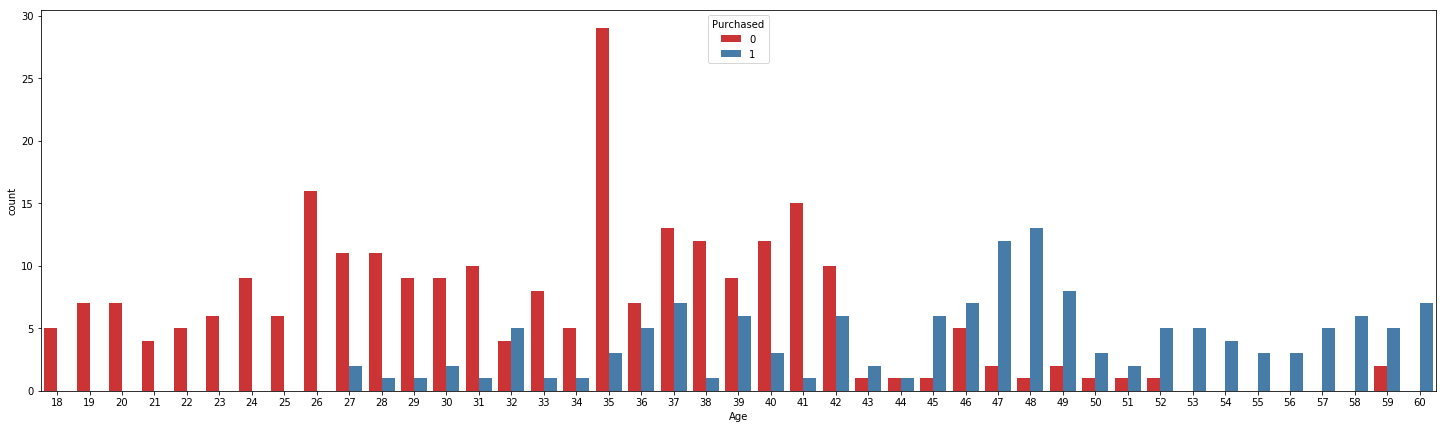

In [33]:
plt.figure(figsize=(25,7))
sns.countplot(x="Age",hue="Purchased",data=social_network,palette="Set1")

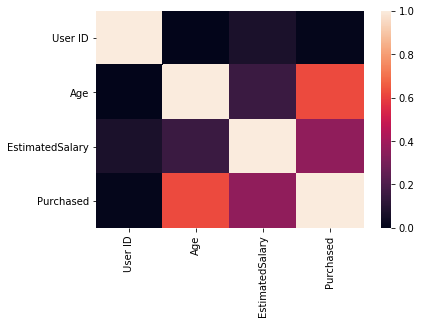

In [34]:
sns.heatmap(social_network.corr())

# 4.Split the data into train and test set:

In [35]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 1/3, 
                                                     random_state = 0)


# 5.Feature Scaling:

In [36]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)


C:\Users\Name\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Name\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Name\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Name\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# 6.KNN to train set:

In [37]:

from sklearn.neighbors import KNeighborsClassifier

KNN_C = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski" , p = 2)

KNN_C.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# 7.Predict the model:

In [38]:
Y_pred = KNN_C.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

# 8.Vistualize the train set result:

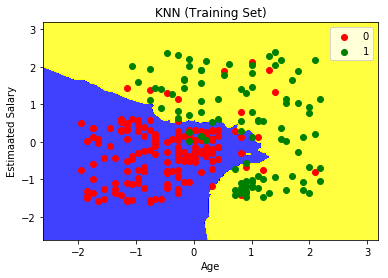

In [39]:
from matplotlib.colors import ListedColormap
X_set,Y_set = X_train,Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max() + 1 ,step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,0].max() + 1 ,step = 0.01))
plt.contourf(X1,X2,KNN_C.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(("blue","yellow")))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0],X_set[Y_set == j,1],
                c = ListedColormap(("red","green"))(i),label = j)
plt.title("KNN (Training Set)")
plt.xlabel("Age")
plt.ylabel("Estimaated Salary")
plt.legend()
plt.show()

# 9.Vistualize the test set result:

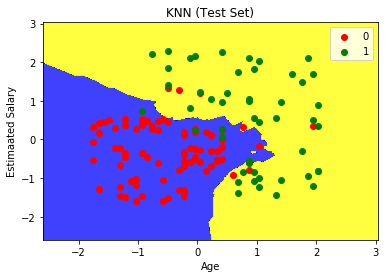

In [46]:
from matplotlib.colors import ListedColormap
X_set,Y_set = X_test,Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max() + 1 ,step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,0].max() + 1 ,step = 0.01))
plt.contourf(X1,X2,KNN_C.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(("blue","yellow")))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0],X_set[Y_set == j,1],
                c = ListedColormap(("red","green"))(i),label = j)
plt.title("KNN (Test Set)")
plt.xlabel("Age")
plt.ylabel("Estimaated Salary")
plt.legend()
plt.show()

# 10.Evaluation the model:

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print("accuracy_score:",accuracy_score(Y_test,Y_pred))

             precision    recall  f1-score   support

          0       0.93      0.92      0.92        85
          1       0.86      0.88      0.87        49

avg / total       0.90      0.90      0.90       134

[[78  7]
 [ 6 43]]
accuracy_score: 0.9029850746268657
